# Load the data and create the variables     

In [1]:
import numpy as np
import pandas as pd
import glob



Folder='./'
DataNameBasis='/*Data'
Pos_chara_b=65 #64,51

t_begin=0

File=glob.glob(Folder+DataNameBasis+"*txt")

data_temp=np.loadtxt(File[0],skiprows=1)
t_interp=np.arange(t_begin,round(np.max(data_temp[0,:])),1,dtype=float)
Data_numpyS2=np.empty((len(File),len(t_interp)))
Data_numpyS1=np.empty((len(File),len(t_interp)))


for i,FileName in enumerate(File):
    data_temp=np.loadtxt(FileName,skiprows=1)
    Data_numpyS2[i,:]=np.interp(t_interp,data_temp[0,:],data_temp[2,:])
    Data_numpyS1[i,:]=np.interp(t_interp,data_temp[0,:],data_temp[3,:])

    
Data_pandaS1=pd.DataFrame(np.transpose(Data_numpyS1))
Data_pandaS2=pd.DataFrame(np.transpose(Data_numpyS2))



# Plot raw signal

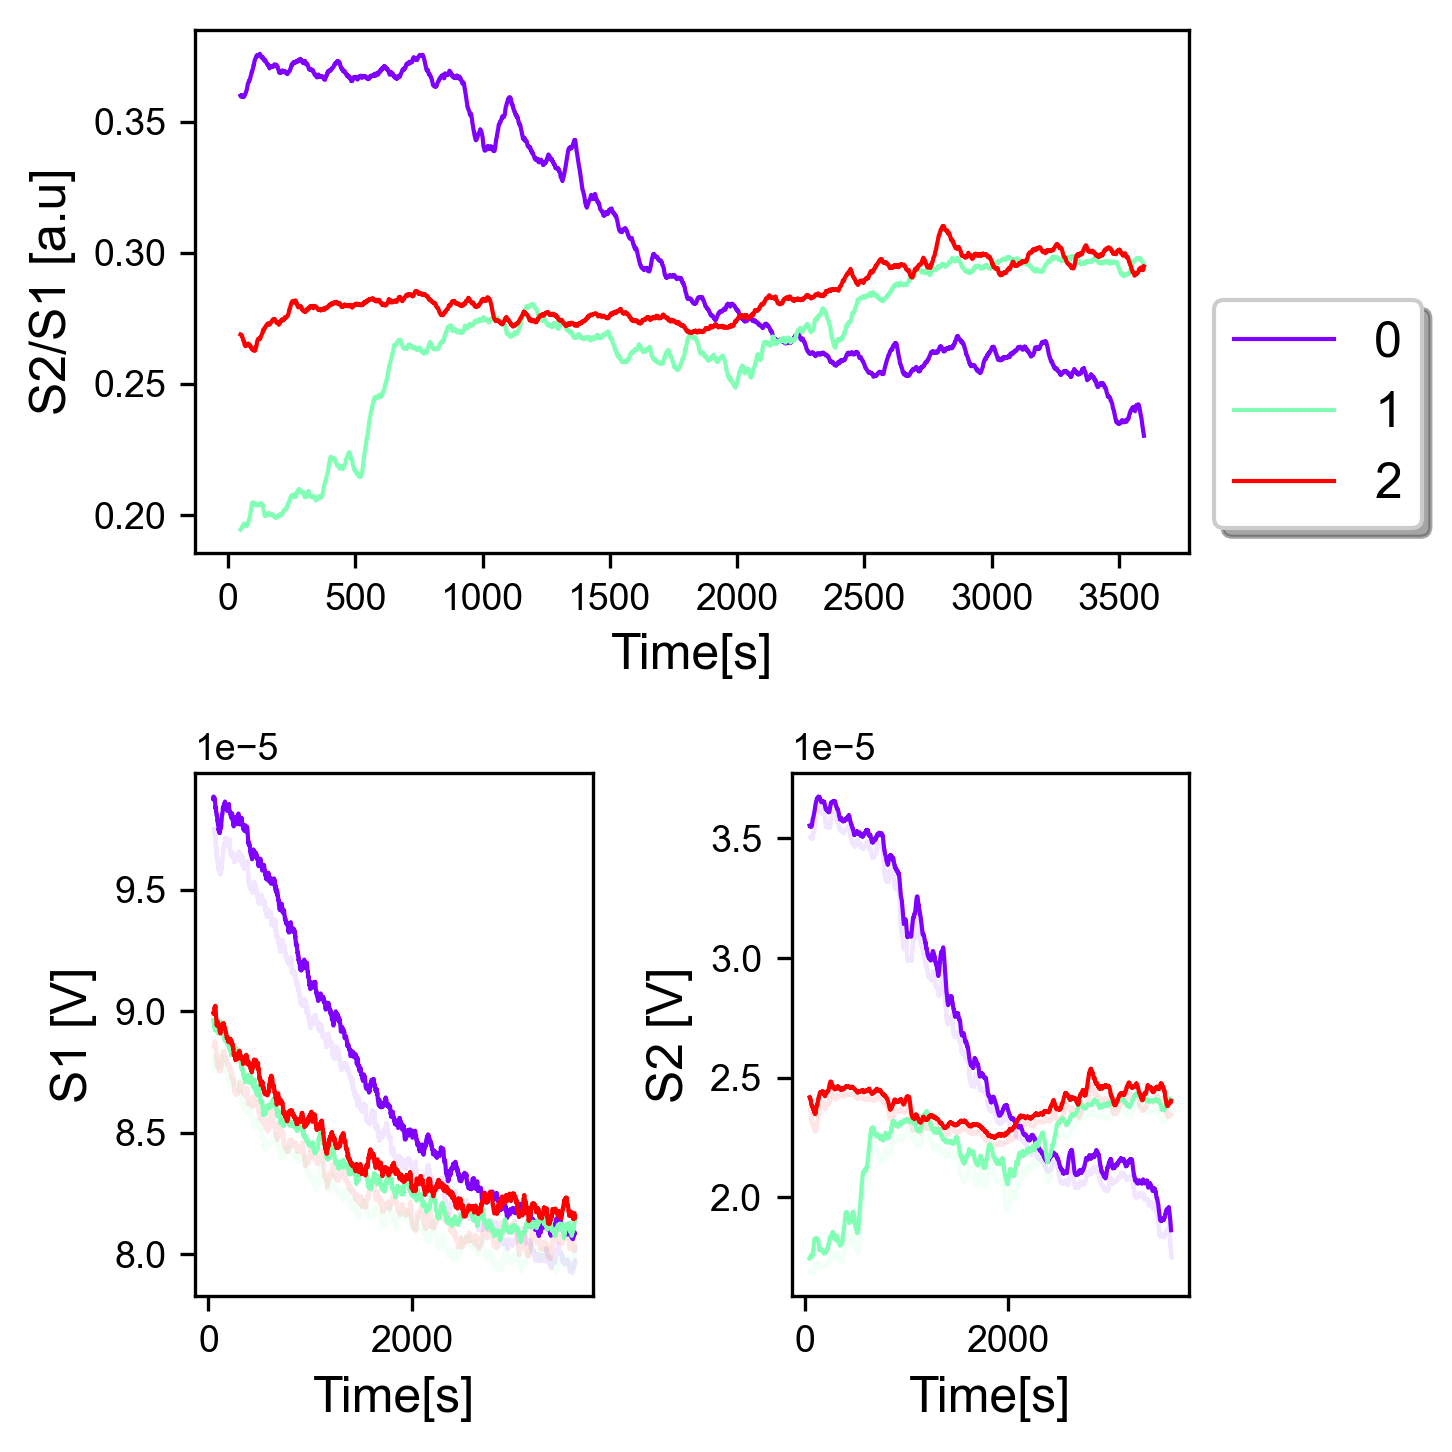

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mat
order=50


RollingStd_DataS1=Data_pandaS1.rolling(window=order,axis=0).std()
Mean_DataS1=Data_pandaS1.rolling(window=order).mean()

RollingStd_DataS2=Data_pandaS2.rolling(window=order,axis=0).std()
Mean_DataS2=Data_pandaS2.rolling(window=order,axis=0).mean()

# Normalised reflexion
Reflexion=Mean_DataS2.divide(Mean_DataS1)

mat.rcParams.update({'font.size':12,'font.family':'sans-serif','font.sans-serif':['Arial'],'xtick.labelsize':9,'ytick.labelsize':9,'figure.dpi':300,'savefig.dpi':300})
color = iter(plt.cm.rainbow(np.linspace(0, 1, len(File))))

fig=plt.figure(figsize=(5, 5))
ax0 =plt.subplot(2,1,1)
ax1 =plt.subplot(2,2,3)
ax2 =plt.subplot(2,2,4)

for i,FileName in enumerate(File):
    c = next(color)
    ax0.plot(t_interp,Reflexion.iloc[:,i],linewidth=1,color=c,label=str(i))

    ax1.plot(t_interp,Mean_DataS1.iloc[:,i],linewidth=1,color=c)
    ax1.fill_between(t_interp, Mean_DataS1.iloc[:,i]-RollingStd_DataS1.iloc[:,i], Mean_DataS1.iloc[:,i]-RollingStd_DataS1.iloc[:,i], alpha=0.1,color=c)

    ax2.plot(t_interp,Mean_DataS2.iloc[:,i],linewidth=1,color=c)
    ax2.fill_between(t_interp, Mean_DataS2.iloc[:,i]-RollingStd_DataS2.iloc[:,i], Mean_DataS2.iloc[:,i]-RollingStd_DataS2.iloc[:,i], alpha=0.1,color=c)

ax0.set(xlabel='Time[s]',ylabel='S2/S1 [a.u]')
ax1.set(xlabel='Time[s]',ylabel='S1 [V]')
ax2.set(xlabel='Time[s]',ylabel='S2 [V]')

ax0.legend(loc='lower left', bbox_to_anchor=(1, -0.0),
          fancybox=True, shadow=True, ncol=1)
plt.tight_layout()
plt.savefig("Sandwitch.png")


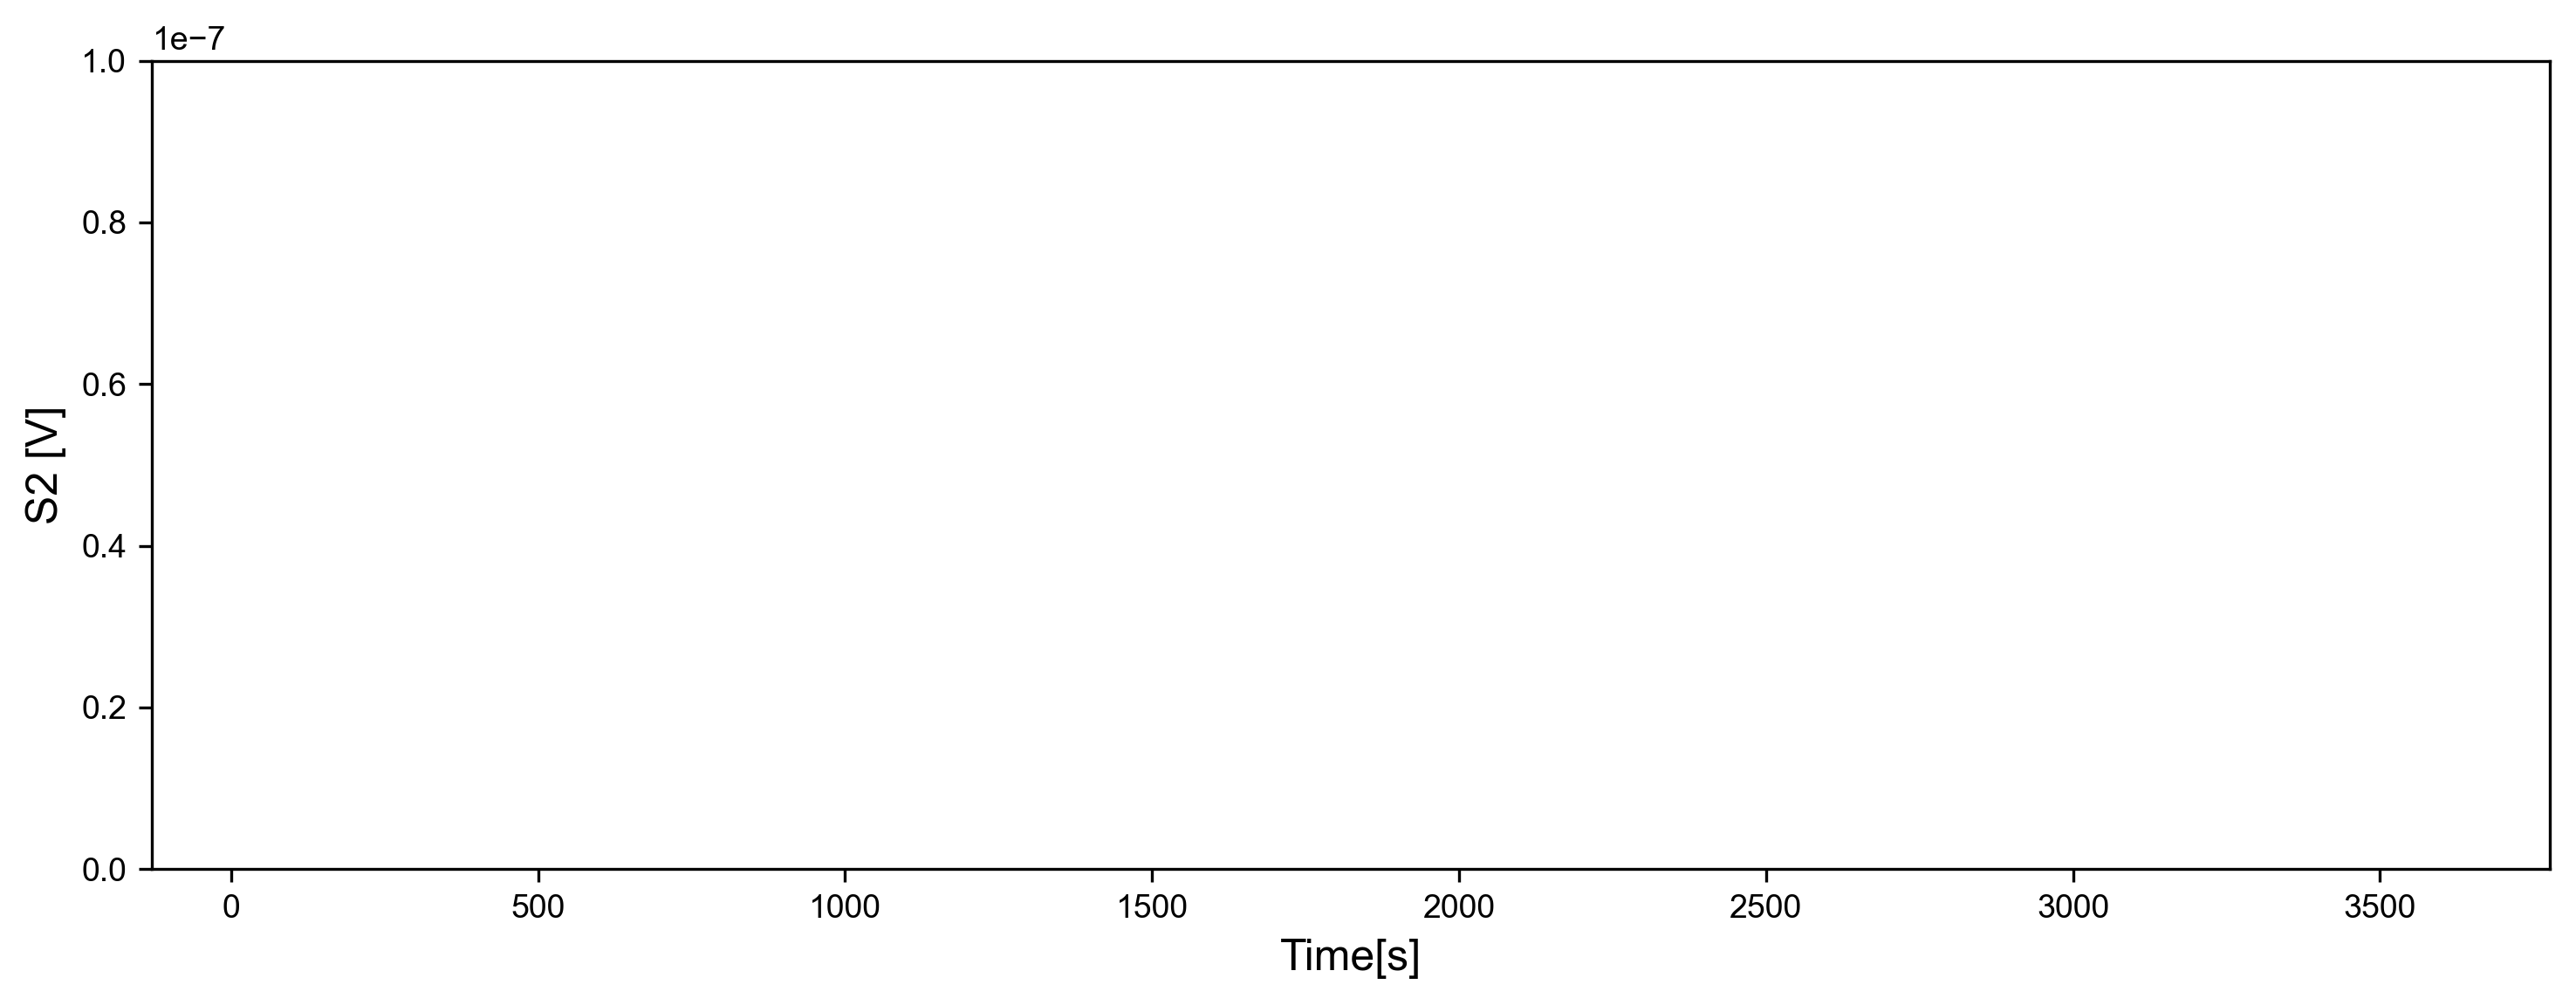

In [3]:

fig=plt.figure(figsize=(10, 4))
ax =plt.subplot(111)
i=0

ax.plot(t_interp,Mean_DataS2.iloc[:,i],linewidth=1)
ax.fill_between(t_interp, Mean_DataS2.iloc[:,i]-RollingStd_DataS2.iloc[:,i], Mean_DataS2.iloc[:,i]-RollingStd_DataS2.iloc[:,i], alpha=0.1)

ax.set(xlabel='Time[s]',ylabel='S2 [V]')

ax.set_ylim(0, 1E-7)
plt.tight_layout()
plt.show()